Hi boys, just playing with the facial features data for now

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from spearman import score_function

In [3]:
# read .csv using pandas
X= pd.read_csv("data/facial_features_train.csv").set_index("ID")
X_to_predict = pd.read_csv("data/facial_features_test.csv").set_index("ID")
y = pd.read_csv("data/training_outputs.csv", delimiter=";").set_index("ID")

# store id's
X_ids = np.array(X.index)
X_to_predict_ids = np.array(X_to_predict.index)

# convert to numpy array
feature_names = np.array(X.columns)
X = X.as_matrix()
X_to_predict = X_to_predict.as_matrix()
y = y.as_matrix().reshape((-1,))

In [4]:
# cut into test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check wich columns are numerical 
numeric_features = np.array([type(value) is not str for value in X[0,:]])

# features that are only in the training set
train_only = ['background_impact_p', 'background_impact_n','angle_impact_p', 'angle_impact_n', 
              'position_impact_p', 'position_impact_n', 'sharpness_impact_p', 'sharpness_impact_n', 
              'exposure_impact_p', 'exposure_impact_n','expression impact_p', 'expression_impact_n']
train_only = np.array([name in train_only for name in feature_names])

# As usual we start with a random forest

In [5]:
# for now we keep only numerical features that are also in the testing (X_to_predict) set
to_keep = (~train_only) & numeric_features

In [6]:
rf = RandomForestRegressor(n_estimators=100)

In [7]:
rf.fit(X_train[:, to_keep], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [13]:
# MSE on train and test
print("train\t", round(rf.score(X_train[:, to_keep], y_train),2))
print("test\t", round(rf.score(X_test[:, to_keep], y_test),2))

train	 0.89
test	 0.2


In [14]:
preds = rf.predict(X_test[:, to_keep])

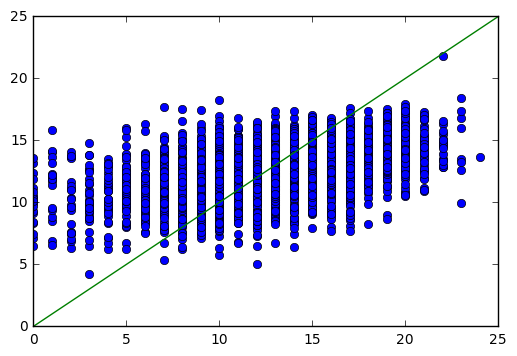

In [15]:
plt.figure()
plt.plot(y_test, preds, "o")
plt.plot([0,25], [0, 25])
plt.show()

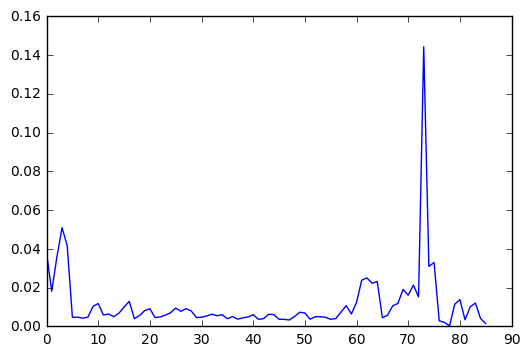

In [16]:
plt.plot(rf.feature_importances_)

In [18]:
# top ten features
print(feature_names[to_keep][np.argsort(rf.feature_importances_)[::-1]][0:10])

['landmarks confidence' 'width' 'height' 'detection score' 'y0'
 'roll angle' 'pan angle' 'left_ear_tragion_y' 'left_ear_tragion_x'
 'right_ear_tragion_y']


In [19]:
score_function(y_pred=np.round(preds), y_true=y_test)

0.43724142263038379

### Submission

In [20]:
# and we can make our first submission
scores_sub = rf.predict(X_to_predict[:, np.array([type(value) is not str for value in X_to_predict[0,:]])])

In [21]:
submission = np.array(np.vstack((X_to_predict_ids, np.round(scores_sub))).T, dtype=int)
submission = pd.DataFrame(submission, columns=["ID", "TARGET"])

In [171]:
name_sub = "rf_submission" + time.strftime("_%d%m_%H%M")+ ".csv"
#submission.to_csv(name_sub, sep=";", index=False)